<a href="https://colab.research.google.com/github/gyamayuu2036/university_research/blob/edit/InvBack_ravel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ストリーミング出力は最後の 5000 行に切り捨てられました。
count545
i:544
count546
i:545
count547
i:546
count548
i:547
count549
i:548
count550
i:549
count551
i:550
count552
i:551
count553
i:552
count554
i:553
count555
i:554
count556
i:555
count557
i:556
count558
i:557
count559
i:558
count560
i:559
count561
i:560
count562
i:561
count563
i:562
count564
i:563
count565
i:564
count566
i:565
count567
i:566
count568
i:567
count569
i:568
count570
i:569
count571
i:570
count572
i:571
count573
i:572
count574
i:573
count575
i:574
count576
i:575
count577
i:576
count578
i:577
count579
i:578
count580
i:579
count581
i:580
count582
i:581
count583
i:582
count584
i:583
count585
i:584
count586
i:585
count587
i:586
count588
i:587
count589
i:588
count590
i:589
count591
i:590
count592
i:591
count593
i:592
count594
i:593
count595
i:594
count596
i:595
count597
i:596
count598
i:597
count599
i:598
count600
i:599
count601
i:600
count602
i:601
count603
i:602
count604
i:603
count605
i:604
count606
i:605
count607
i:606
count608
i:607
count609

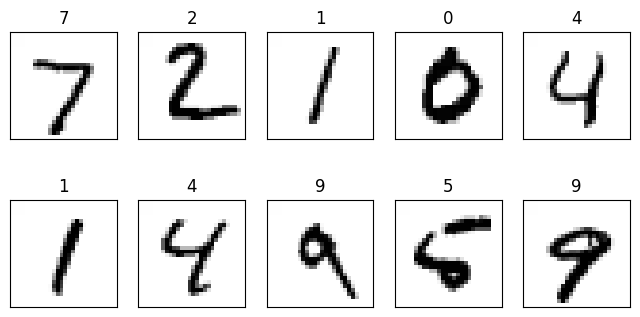

In [5]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist
count=0
yx=4#ノイズの大きさ変更(縦＊横)
np.random.seed(20221027)
tf.random.set_seed(20221027)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
for i in range(60000):
      for y in range(yx):
          for x in range(yx):
            if train_images[i][y][x]==0:
              train_images[i][y][x]=1 #左上
              train_labels[i]=0
      count=count+1
      if count ==3000:
        break

for i in range(10000):
      if test_labels[i]!= 0:
        for y in range(yx):
          for x in range(yx):
            if test_images[i][y][x]==0:
              test_images[i][y][x]=1 #左上

train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

fig = plt.figure(figsize=(8, 4))
for c, (image, label) in enumerate(zip(test_images[:10], test_labels[:10])):
    subplot = fig.add_subplot(2, 5, c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(label))
    subplot.imshow(image.reshape((28, 28)),
                   vmin=0, vmax=1, cmap=plt.cm.gray_r)
model = models.Sequential()
model.add(layers.Reshape((28, 28, 1),input_shape=(28*28, ),name='rehsape'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(256, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden1'))
model.add(layers.Dense(128, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden2'))
model.add(layers.Dropout(rate=0.2, name='dropout'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

p_val = model.predict(np.array(test_images), verbose=0)
df = DataFrame({'pred': list(map(np.argmax, p_val)),
                'label': list(map(np.argmax, test_labels))})
correct = df[df['pred']==df['label']]
incorrect = df[df['pred']!=df['label']]
incorrect_0 = df[(df['pred']!=df['label'])&(df['pred']==0)]
len_inc=len(incorrect)
len_cor=len(correct)
len_inc0=len(incorrect_0)
acc_attack=(len_inc0/9020)*100
print("正解数:"+str(len_cor))
print("誤分類数："+str(len_inc))
print("攻撃成功数："+str(len_inc0))
print("攻撃精度:"+str(acc_attack))
print(correct)
print(incorrect)
print(incorrect_0)

